In [69]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PySDM import Formulae
from PySDM.physics import si

aerosol data

In [70]:
aero_data = {'species' : ['SO4', 'NO3', 'Cl', 'NH4', 'MSA', 'ARO1', 'ARO2', 'ALK1', 'OLE1', 'API1', 'API2', 'LIM1', 'LIM2', 'CO3', 'Na', 'Ca ', 'OIN', 'OC', 'BC', 'H2O'],
             'density' : [1800, 1800, 2200, 1800, 1800, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 2600, 2200, 2600, 2600, 1000, 1800, 1000],
             'ions' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             'molec_weight' : [96, 62, 35.5, 18, 95, 150,150, 140, 140, 184, 184, 200, 200, 60, 23, 40, 1, 1, 1, 18],
             'kappa' : [0.65, 0.65, 0.53, 0.65, 0.53, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.53, 0.53, 0.53, 0.1, 0.001, 0, 0]}
aero_file=pd.DataFrame(aero_data)

species = aero_file['species']
density = aero_file['density']
ions = aero_file['ions']
molec_weight = aero_file['molec_weight']
kappa = aero_file['kappa']
sgm_w = 72 * 1e-3 # N m-1
sgm_org = 40 * 1e-3 # N m-1
delta_min = 0.16 * 1e-9 # m 
univ_gas_const = 8.3144     #kg⋅m2⋅s−2⋅K−1⋅mol−1
water_density = 1e3           #kg/m3
water_molec_weight = 18e-3    #kg/mol
temp = 300                    #Kelvin

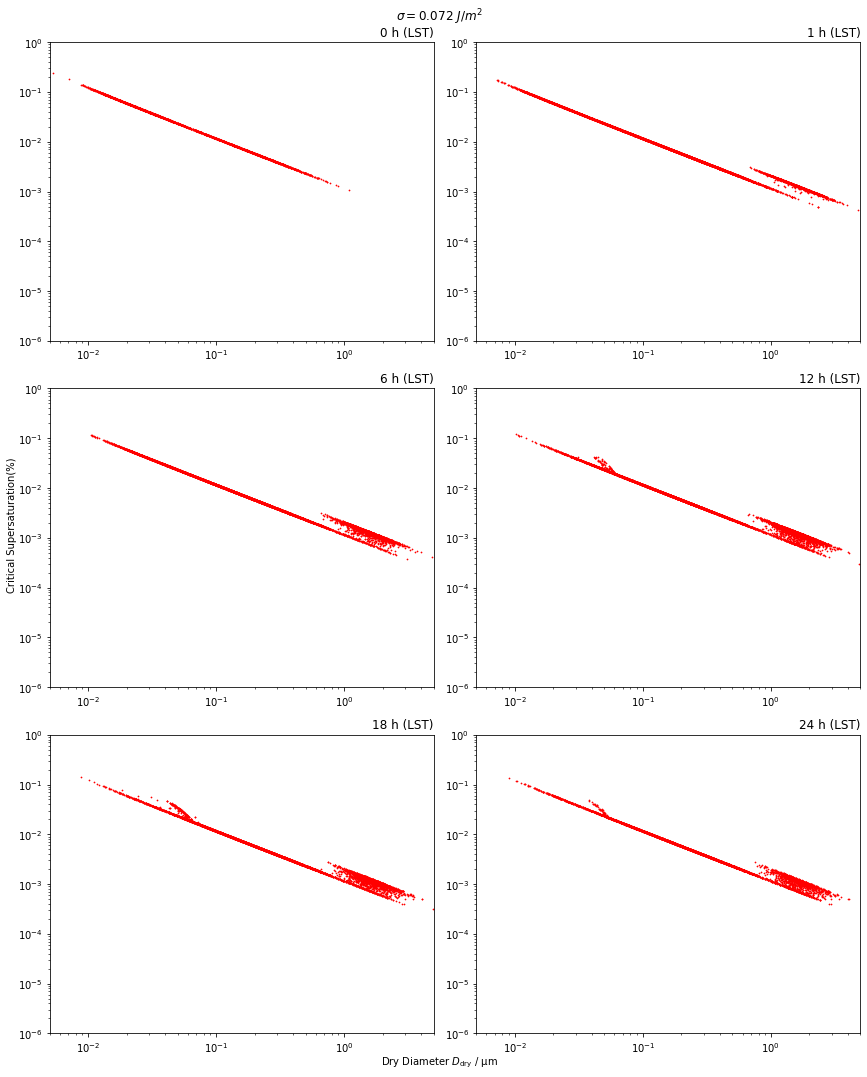

In [71]:
fig_scs_sgm_72 = plt.figure(figsize=(12,15))
directory = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/do_coagulation"
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        # 00
        if ("single_particle_00000001" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters_72_0 = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            oc_masses = f.oc_masses
            so4_masses = f.so4_masses
            no3_masses = f.no3_masses
            nh4_masses = f.nh4_masses
            soa_masses = f.soa_masses
            cl_masses = f.cl_masses
            msa_masses = f.msa_masses
            aro1_masses = f.aro1_masses
            aro2_masses = f.aro2_masses
            alk1_masses = f.alk1_masses
            ole1_masses = f.ole1_masses
            api1_masses = f.api1_masses
            api2_masses = f.api2_masses
            lim1_masses = f.lim1_masses
            lim2_masses = f.lim2_masses
            co3_masses = f.co3_masses
            na_masses = f.na_masses
            ca_masses = f.ca_masses
            oin_masses = f.oin_masses
            h2o_masses = f.h2o_masses

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O
            
            kappa_single_72_0 = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm_72_0 = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss_72_0 = np.exp((4*sgm_72_0*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters_72_0))-1
        
            ax = plt.subplot(3,2,1)
            ax = plt.scatter(dry_diameters_72_0 * 1e6, crit_ss_72_0, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')

            # 01
        if ("single_particle_00000002" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters_72_1 = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            oc_masses = f.oc_masses
            so4_masses = f.so4_masses
            no3_masses = f.no3_masses
            nh4_masses = f.nh4_masses
            soa_masses = f.soa_masses
            cl_masses = f.cl_masses
            msa_masses = f.msa_masses
            aro1_masses = f.aro1_masses
            aro2_masses = f.aro2_masses
            alk1_masses = f.alk1_masses
            ole1_masses = f.ole1_masses
            api1_masses = f.api1_masses
            api2_masses = f.api2_masses
            lim1_masses = f.lim1_masses
            lim2_masses = f.lim2_masses
            co3_masses = f.co3_masses
            na_masses = f.na_masses
            ca_masses = f.ca_masses
            oin_masses = f.oin_masses
            h2o_masses = f.h2o_masses

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            kappa_single_72_1 = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm_72_1 = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss_72_1 = np.exp((4*sgm_72_1*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters_72_1))-1
            
            ax = plt.subplot(3,2,2)
            ax = plt.scatter(dry_diameters_72_1 * 1e6, crit_ss_72_1, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')

            # 06
        if ("single_particle_00000007" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters_72_2 = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            oc_masses = f.oc_masses
            so4_masses = f.so4_masses
            no3_masses = f.no3_masses
            nh4_masses = f.nh4_masses
            soa_masses = f.soa_masses
            cl_masses = f.cl_masses
            msa_masses = f.msa_masses
            aro1_masses = f.aro1_masses
            aro2_masses = f.aro2_masses
            alk1_masses = f.alk1_masses
            ole1_masses = f.ole1_masses
            api1_masses = f.api1_masses
            api2_masses = f.api2_masses
            lim1_masses = f.lim1_masses
            lim2_masses = f.lim2_masses
            co3_masses = f.co3_masses
            na_masses = f.na_masses
            ca_masses = f.ca_masses
            oin_masses = f.oin_masses
            h2o_masses = f.h2o_masses

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            kappa_single_72_2 = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm_72_2 = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss_72_2 = np.exp((4*sgm_72_2*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters_72_2))-1
            
            ax = plt.subplot(3,2,3)
            ax = plt.scatter(dry_diameters_72_2 * 1e6, crit_ss_72_2, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')

            # 12
        if ("single_particle_00000013" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters_72_3 = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            oc_masses = f.oc_masses
            so4_masses = f.so4_masses
            no3_masses = f.no3_masses
            nh4_masses = f.nh4_masses
            soa_masses = f.soa_masses
            cl_masses = f.cl_masses
            msa_masses = f.msa_masses
            aro1_masses = f.aro1_masses
            aro2_masses = f.aro2_masses
            alk1_masses = f.alk1_masses
            ole1_masses = f.ole1_masses
            api1_masses = f.api1_masses
            api2_masses = f.api2_masses
            lim1_masses = f.lim1_masses
            lim2_masses = f.lim2_masses
            co3_masses = f.co3_masses
            na_masses = f.na_masses
            ca_masses = f.ca_masses
            oin_masses = f.oin_masses
            h2o_masses = f.h2o_masses

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            kappa_single_72_3 = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm_72_3 = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss_72_3 = np.exp((4*sgm_72_3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters_72_3))-1
            
            ax = plt.subplot(3,2,4)
            ax = plt.scatter(dry_diameters_72_3 * 1e6, crit_ss_72_3, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')

        if ("single_particle_00000019" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters_72_4 = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            oc_masses = f.oc_masses
            so4_masses = f.so4_masses
            no3_masses = f.no3_masses
            nh4_masses = f.nh4_masses
            soa_masses = f.soa_masses
            cl_masses = f.cl_masses
            msa_masses = f.msa_masses
            aro1_masses = f.aro1_masses
            aro2_masses = f.aro2_masses
            alk1_masses = f.alk1_masses
            ole1_masses = f.ole1_masses
            api1_masses = f.api1_masses
            api2_masses = f.api2_masses
            lim1_masses = f.lim1_masses
            lim2_masses = f.lim2_masses
            co3_masses = f.co3_masses
            na_masses = f.na_masses
            ca_masses = f.ca_masses
            oin_masses = f.oin_masses
            h2o_masses = f.h2o_masses

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O
            
            kappa_single_72_4 = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm_72_4 = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss_72_4 = np.exp((4*sgm_72_4*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters_72_4))-1
            
            ax = plt.subplot(3,2,5)
            ax = plt.scatter(dry_diameters_72_4 * 1e6, crit_ss_72_4, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right') 

        if ("single_particle_00000025" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters_72_5 = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            oc_masses = f.oc_masses
            so4_masses = f.so4_masses
            no3_masses = f.no3_masses
            nh4_masses = f.nh4_masses
            soa_masses = f.soa_masses
            cl_masses = f.cl_masses
            msa_masses = f.msa_masses
            aro1_masses = f.aro1_masses
            aro2_masses = f.aro2_masses
            alk1_masses = f.alk1_masses
            ole1_masses = f.ole1_masses
            api1_masses = f.api1_masses
            api2_masses = f.api2_masses
            lim1_masses = f.lim1_masses
            lim2_masses = f.lim2_masses
            co3_masses = f.co3_masses
            na_masses = f.na_masses
            ca_masses = f.ca_masses
            oin_masses = f.oin_masses
            h2o_masses = f.h2o_masses

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            kappa_single_72_5 = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm_72_5 = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss_72_5 = np.exp((4*sgm_72_5*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters_72_5))-1
            
            ax = plt.subplot(3,2,6)
            ax = plt.scatter(dry_diameters_72_5 * 1e6, crit_ss_72_5, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')


fig_scs_sgm_72.suptitle("$\sigma = 0.072\ J/m^2$")
fig_scs_sgm_72.text(0.5, 0, r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$", ha='center')
fig_scs_sgm_72.text(0, 0.5, r"Critical Supersaturation(%)", va='center', rotation='vertical')
plt.tight_layout()


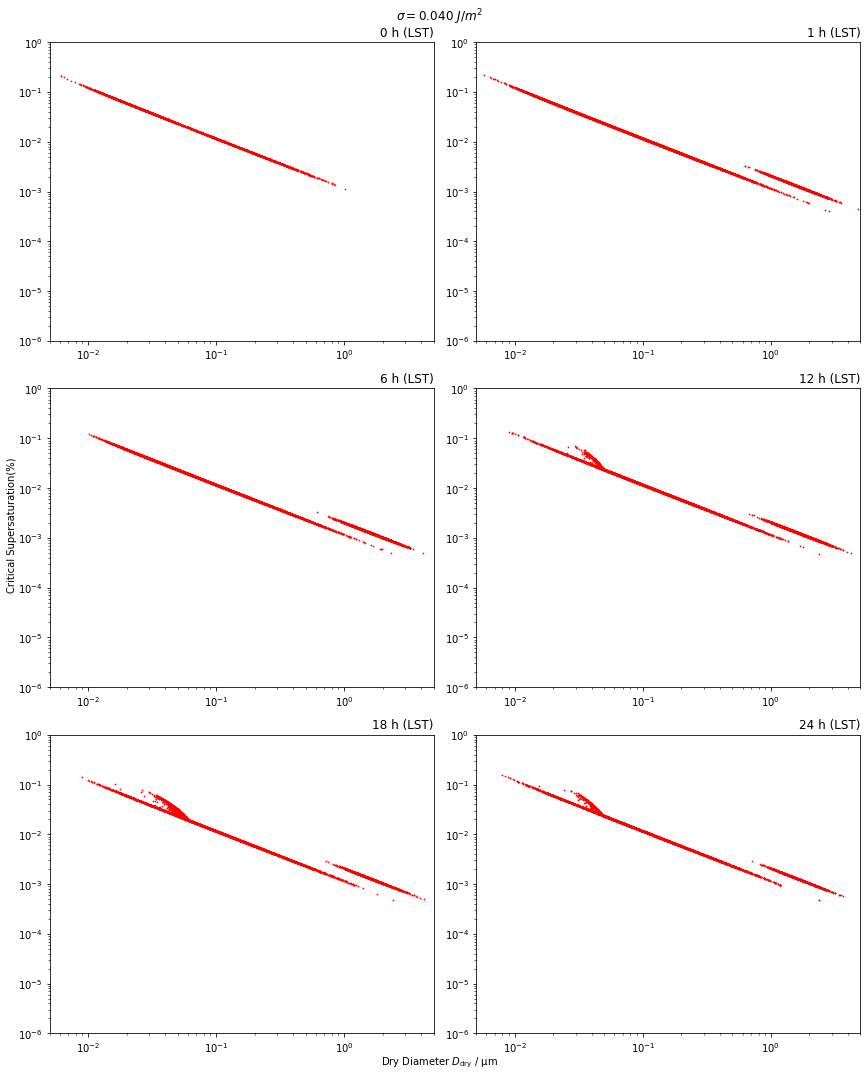

In [72]:
fig_scs_sgm_40 = plt.figure(figsize=(12,15))
directory = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/sgm40"
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        # 00
        if ("single_particle_00000001" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters_40_0 = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            oc_masses = f.oc_masses
            so4_masses = f.so4_masses
            no3_masses = f.no3_masses
            nh4_masses = f.nh4_masses
            soa_masses = f.soa_masses
            cl_masses = f.cl_masses
            msa_masses = f.msa_masses
            aro1_masses = f.aro1_masses
            aro2_masses = f.aro2_masses
            alk1_masses = f.alk1_masses
            ole1_masses = f.ole1_masses
            api1_masses = f.api1_masses
            api2_masses = f.api2_masses
            lim1_masses = f.lim1_masses
            lim2_masses = f.lim2_masses
            co3_masses = f.co3_masses
            na_masses = f.na_masses
            ca_masses = f.ca_masses
            oin_masses = f.oin_masses
            h2o_masses = f.h2o_masses

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O
            
            kappa_single_40_0 = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm_40_0 = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss_40_0 = np.exp((4*sgm_40_0*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters_40_0))-1
        
            ax = plt.subplot(3,2,1)
            ax = plt.scatter(dry_diameters_40_0 * 1e6, crit_ss_40_0, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')

            # 01
        if ("single_particle_00000002" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters_40_1 = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            oc_masses = f.oc_masses
            so4_masses = f.so4_masses
            no3_masses = f.no3_masses
            nh4_masses = f.nh4_masses
            soa_masses = f.soa_masses
            cl_masses = f.cl_masses
            msa_masses = f.msa_masses
            aro1_masses = f.aro1_masses
            aro2_masses = f.aro2_masses
            alk1_masses = f.alk1_masses
            ole1_masses = f.ole1_masses
            api1_masses = f.api1_masses
            api2_masses = f.api2_masses
            lim1_masses = f.lim1_masses
            lim2_masses = f.lim2_masses
            co3_masses = f.co3_masses
            na_masses = f.na_masses
            ca_masses = f.ca_masses
            oin_masses = f.oin_masses
            h2o_masses = f.h2o_masses

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            kappa_single_40_1 = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm_40_1 = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss_40_1 = np.exp((4*sgm_40_1*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters_40_1))-1
            
            ax = plt.subplot(3,2,2)
            ax = plt.scatter(dry_diameters_40_1 * 1e6, crit_ss_40_1, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')

            # 06
        if ("single_particle_00000007" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters_40_2 = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            oc_masses = f.oc_masses
            so4_masses = f.so4_masses
            no3_masses = f.no3_masses
            nh4_masses = f.nh4_masses
            soa_masses = f.soa_masses
            cl_masses = f.cl_masses
            msa_masses = f.msa_masses
            aro1_masses = f.aro1_masses
            aro2_masses = f.aro2_masses
            alk1_masses = f.alk1_masses
            ole1_masses = f.ole1_masses
            api1_masses = f.api1_masses
            api2_masses = f.api2_masses
            lim1_masses = f.lim1_masses
            lim2_masses = f.lim2_masses
            co3_masses = f.co3_masses
            na_masses = f.na_masses
            ca_masses = f.ca_masses
            oin_masses = f.oin_masses
            h2o_masses = f.h2o_masses

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            kappa_single_40_2 = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm_40_2 = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss_40_2 = np.exp((4*sgm_40_2*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters_40_2))-1
            
            ax = plt.subplot(3,2,3)
            ax = plt.scatter(dry_diameters_40_2 * 1e6, crit_ss_40_2, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')

            # 12
        if ("single_particle_00000013" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters_40_3 = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            oc_masses = f.oc_masses
            so4_masses = f.so4_masses
            no3_masses = f.no3_masses
            nh4_masses = f.nh4_masses
            soa_masses = f.soa_masses
            cl_masses = f.cl_masses
            msa_masses = f.msa_masses
            aro1_masses = f.aro1_masses
            aro2_masses = f.aro2_masses
            alk1_masses = f.alk1_masses
            ole1_masses = f.ole1_masses
            api1_masses = f.api1_masses
            api2_masses = f.api2_masses
            lim1_masses = f.lim1_masses
            lim2_masses = f.lim2_masses
            co3_masses = f.co3_masses
            na_masses = f.na_masses
            ca_masses = f.ca_masses
            oin_masses = f.oin_masses
            h2o_masses = f.h2o_masses

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            kappa_single_40_3 = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm_40_3 = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss_40_3 = np.exp((4*sgm_40_3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters_40_3))-1
            
            ax = plt.subplot(3,2,4)
            ax = plt.scatter(dry_diameters_40_3 * 1e6, crit_ss_40_3, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')

        if ("single_particle_00000019" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters_40_4 = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            oc_masses = f.oc_masses
            so4_masses = f.so4_masses
            no3_masses = f.no3_masses
            nh4_masses = f.nh4_masses
            soa_masses = f.soa_masses
            cl_masses = f.cl_masses
            msa_masses = f.msa_masses
            aro1_masses = f.aro1_masses
            aro2_masses = f.aro2_masses
            alk1_masses = f.alk1_masses
            ole1_masses = f.ole1_masses
            api1_masses = f.api1_masses
            api2_masses = f.api2_masses
            lim1_masses = f.lim1_masses
            lim2_masses = f.lim2_masses
            co3_masses = f.co3_masses
            na_masses = f.na_masses
            ca_masses = f.ca_masses
            oin_masses = f.oin_masses
            h2o_masses = f.h2o_masses

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O
            
            kappa_single_40_4 = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm_40_4 = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss_40_4 = np.exp((4*sgm_40_4*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters_40_4))-1
            
            ax = plt.subplot(3,2,5)
            ax = plt.scatter(dry_diameters_40_4 * 1e6, crit_ss_40_4, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right') 

        if ("single_particle_00000025" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters_40_5 = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            oc_masses = f.oc_masses
            so4_masses = f.so4_masses
            no3_masses = f.no3_masses
            nh4_masses = f.nh4_masses
            soa_masses = f.soa_masses
            cl_masses = f.cl_masses
            msa_masses = f.msa_masses
            aro1_masses = f.aro1_masses
            aro2_masses = f.aro2_masses
            alk1_masses = f.alk1_masses
            ole1_masses = f.ole1_masses
            api1_masses = f.api1_masses
            api2_masses = f.api2_masses
            lim1_masses = f.lim1_masses
            lim2_masses = f.lim2_masses
            co3_masses = f.co3_masses
            na_masses = f.na_masses
            ca_masses = f.ca_masses
            oin_masses = f.oin_masses
            h2o_masses = f.h2o_masses

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            kappa_single_40_5 = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm_40_5 = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss_40_5 = np.exp((4*sgm_40_5*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters_40_5))-1
            
            ax = plt.subplot(3,2,6)
            ax = plt.scatter(dry_diameters_40_5 * 1e6, crit_ss_40_5, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')


fig_scs_sgm_40.suptitle("$\sigma = 0.040\ J/m^2$")
fig_scs_sgm_40.text(0.5, 0, r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$", ha='center')
fig_scs_sgm_40.text(0, 0.5, r"Critical Supersaturation(%)", va='center', rotation='vertical')
plt.tight_layout()

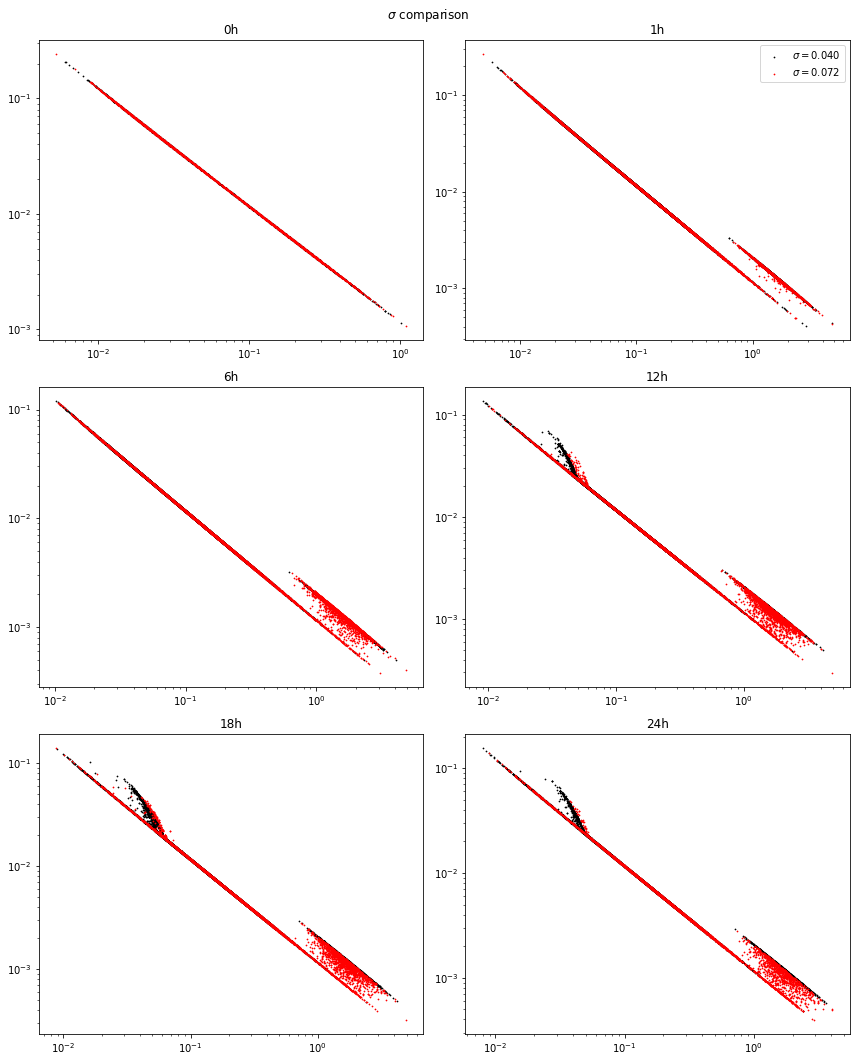

In [80]:

comp_fig, axs = plt.subplots(3, 2)
comp_fig.suptitle("$\sigma$ comparison")
comp_fig.set_figheight(15)
comp_fig.set_figwidth(12)

axs[0,0].scatter(dry_diameters_40_0 * 1e6, crit_ss_40_0, s = 2.5, linewidths = 0.1, c='k')
axs[0,0].scatter(dry_diameters_72_0 * 1e6, crit_ss_72_0, s = 2.5, linewidths = 0.1, c='r')
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_title('0h')

axs[0,1].scatter(dry_diameters_40_1 * 1e6, crit_ss_40_1, s = 2.5, linewidths = 0.1, c='k')
axs[0,1].scatter(dry_diameters_72_1 * 1e6, crit_ss_72_1, s = 2.5, linewidths = 0.1, c='r')
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_title('1h')
axs[0,1].legend(['$\sigma=0.040$','$\sigma=0.072$'])

axs[1,0].scatter(dry_diameters_40_2 * 1e6, crit_ss_40_2, s = 2.5, linewidths = 0.1, c='k')
axs[1,0].scatter(dry_diameters_72_2 * 1e6, crit_ss_72_2, s = 2.5, linewidths = 0.1, c='r')
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,0].set_title('6h')

axs[1,1].scatter(dry_diameters_40_3 * 1e6, crit_ss_40_3, s = 2.5, linewidths = 0.1, c='k')
axs[1,1].scatter(dry_diameters_72_3 * 1e6, crit_ss_72_3, s = 2.5, linewidths = 0.1, c='r')
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
axs[1,1].set_title('12h')

axs[2,0].scatter(dry_diameters_40_4 * 1e6, crit_ss_40_4, s = 2.5, linewidths = 0.1, c='k')
axs[2,0].scatter(dry_diameters_72_4 * 1e6, crit_ss_72_4, s = 2.5, linewidths = 0.1, c='r')
axs[2,0].set_xscale('log')
axs[2,0].set_yscale('log')
axs[2,0].set_title('18h')

axs[2,1].scatter(dry_diameters_40_5 * 1e6, crit_ss_40_5, s = 2.5, linewidths = 0.1, c='k')
axs[2,1].scatter(dry_diameters_72_5 * 1e6, crit_ss_72_5, s = 2.5, linewidths = 0.1, c='r')
axs[2,1].set_xscale('log')
axs[2,1].set_yscale('log')
axs[2,1].set_title('24h')

comp_fig.tight_layout()
